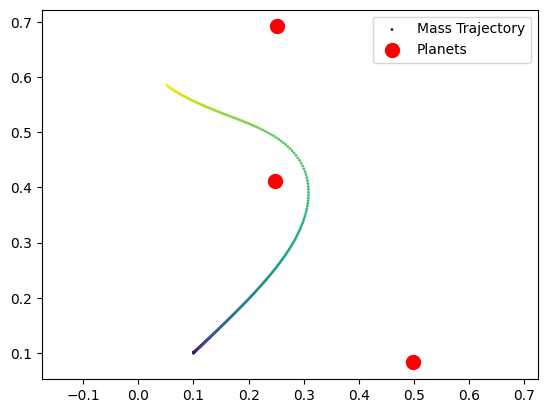

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def calc_a(x, y, planets):
    a_x, a_y = 0, 0
    #Looping over accelerations due to each planet
    for j in range(len(planets)):
        x_diff = planets[j, 0] - x
        y_diff = planets[j, 1] - y
        a_x += (x_diff)*1/(pow(x_diff**2+y_diff**2, 3/2))
        a_y += (y_diff)*1/(pow(x_diff**2+y_diff**2, 3/2))

    return [a_x, a_y]

def velocity_verlet(calc_a, planets, v_x, v_y, x, y, dt, i):

    #Get acceleration
    a_x, a_y = calc_a(x[i], y[i], planets)

    #Update position
    x[i+1] = x[i] + v_x[i]*dt + 0.5*a_x*dt**2
    y[i+1] = y[i] + v_y[i]*dt + 0.5*a_y*dt**2

    #Update velocity using current acceleration
    v_x_curr_a = a_x*0.5*dt
    v_y_curr_a = a_y*0.5*dt

    #Update acceleration
    a_x, a_y = calc_a(x[i], y[i], planets)
    #Update velocity using new acceleration
    v_x[i+1] = v_x[i] + v_x_curr_a + a_x*0.5*dt
    v_y[i+1] = v_y[i] + v_y_curr_a + a_y*0.5*dt

iter = 300
dt = 0.001
dampening_factor = 0.001

#The position of planets and test masses on R^
planets = np.random.rand(round(np.random.binomial(10,0.4)),2)
masses = np.array([0.1,0.1])

#Using np.array for now, maybe lists later
x = np.zeros(iter)
y = np.zeros(iter)
v_x = np.zeros(iter)
v_y = np.zeros(iter)
x[0] = masses[0]
y[0] = masses[1]

for i in range(iter-1):

    #Updating particles as time passes
    velocity_verlet(calc_a, planets, v_x, v_y, x, y, dt, i)

    #Dampening for convergence's sake
    v_x *= (1-dampening_factor)
    v_y *= (1-dampening_factor)

#Visualizing
    #Particle
plt.scatter(x, y, c=np.linspace(0, 1, iter), s=1, label='Mass Trajectory')
    # Planets
plt.scatter(planets[:, 0], planets[:, 1], s=100, marker='o', color='red', label='Planets')
plt.axis('equal')
plt.legend()
plt.show()
